In [16]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [17]:
df = pd.read_csv('data_eda_1.csv',index_col=0)
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,IncomeGroup_Low income,IncomeGroup_Medium income,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_Low,CreditRating_Medium,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Professional,New_maritalstatus_Yes
0,1,-1.089034,-0.422798,-1.125036,-0.044197,-0.995504,-0.621914,-0.566549,-0.450622,-0.889336,-0.306586,-0.568253,-0.824996,-0.604886,0.460593,-1.610162,-1.182049,0.012439,-0.218215,-0.899446,-0.068108,-0.150674,2.477643,1.165226,-0.581885,0.807270,1.119678,0.107745,1.172978,-0.940475,5.452813,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,1,-1.556158,-1.937776,-1.450779,-0.912074,-0.995504,-0.621914,0.018886,0.088432,-1.200278,-1.216280,-1.013639,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.319026,-1.537118,-1.429573,-0.068108,-0.897074,2.388088,-0.760155,-0.581885,0.807270,-0.767089,3.053676,0.489551,1.056411,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,1
2,0,-0.420564,-1.998448,-0.272519,-0.912074,-0.995504,-0.621914,0.026624,0.088432,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.495143,-1.466096,-1.182049,-1.665568,-1.154741,-1.675080,-0.068108,-0.897074,2.448340,-0.760155,-0.581885,-0.850485,-0.767089,3.614747,-0.022125,0.852418,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1
3,0,0.826362,1.392611,1.180063,1.170112,-0.995504,-0.621914,0.655061,0.284291,2.228625,1.290204,1.349529,1.501970,1.946418,0.941048,2.908416,2.064116,2.505608,1.813093,2.044460,-0.068108,1.849625,2.418494,1.165226,1.348420,1.895246,1.700472,0.466880,0.132730,-0.940475,-0.183392,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,-1.544648,-2.469987,-1.450779,-0.912074,-0.995504,-0.621914,0.034384,0.083251,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.898531,-1.807759,-1.675080,-0.068108,-0.897074,2.226882,1.165226,1.348420,1.594044,1.552675,1.628558,0.687544,1.160087,-0.183392,-0.132239,-0.221591,5.190155,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


In [18]:
df.reset_index(inplace=True, drop=True)

In [19]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,IncomeGroup_Low income,IncomeGroup_Medium income,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_Low,CreditRating_Medium,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Professional,New_maritalstatus_Yes
0,1,-1.089034,-0.422798,-1.125036,-0.044197,-0.995504,-0.621914,-0.566549,-0.450622,-0.889336,-0.306586,-0.568253,-0.824996,-0.604886,0.460593,-1.610162,-1.182049,0.012439,-0.218215,-0.899446,-0.068108,-0.150674,2.477643,1.165226,-0.581885,0.807270,1.119678,0.107745,1.172978,-0.940475,5.452813,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,1,-1.556158,-1.937776,-1.450779,-0.912074,-0.995504,-0.621914,0.018886,0.088432,-1.200278,-1.216280,-1.013639,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.319026,-1.537118,-1.429573,-0.068108,-0.897074,2.388088,-0.760155,-0.581885,0.807270,-0.767089,3.053676,0.489551,1.056411,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,1
2,0,-0.420564,-1.998448,-0.272519,-0.912074,-0.995504,-0.621914,0.026624,0.088432,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.495143,-1.466096,-1.182049,-1.665568,-1.154741,-1.675080,-0.068108,-0.897074,2.448340,-0.760155,-0.581885,-0.850485,-0.767089,3.614747,-0.022125,0.852418,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1
3,0,0.826362,1.392611,1.180063,1.170112,-0.995504,-0.621914,0.655061,0.284291,2.228625,1.290204,1.349529,1.501970,1.946418,0.941048,2.908416,2.064116,2.505608,1.813093,2.044460,-0.068108,1.849625,2.418494,1.165226,1.348420,1.895246,1.700472,0.466880,0.132730,-0.940475,-0.183392,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,-1.544648,-2.469987,-1.450779,-0.912074,-0.995504,-0.621914,0.034384,0.083251,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.898531,-1.807759,-1.675080,-0.068108,-0.897074,2.226882,1.165226,1.348420,1.594044,1.552675,1.628558,0.687544,1.160087,-0.183392,-0.132239,-0.221591,5.190155,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


## Train-Test Split

Before applying various classification techniques to predict the Churn, let us split the dataset in train and test set.

In [20]:
df_feature = df.drop('Churn', axis = 1)
df_target = df['Churn']

In [21]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
df_1 = sm.add_constant(df_feature)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test ,y_train ,y_test = train_test_split(df_feature,df_target, random_state=1, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35475, 57)
y_train:  (35475,)
x_test:  (15204, 57)
y_test:  (15204,)


#### Create a generalized function to create a dataframe containing the scores for the models.

In [22]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

#### Create a generalized function to calculate the metrics for the train and the test set.

In [23]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(x_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [24]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(x_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

# 4. Random Forest for Classification

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes.

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree.

In [25]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 15, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(x_train, y_train)

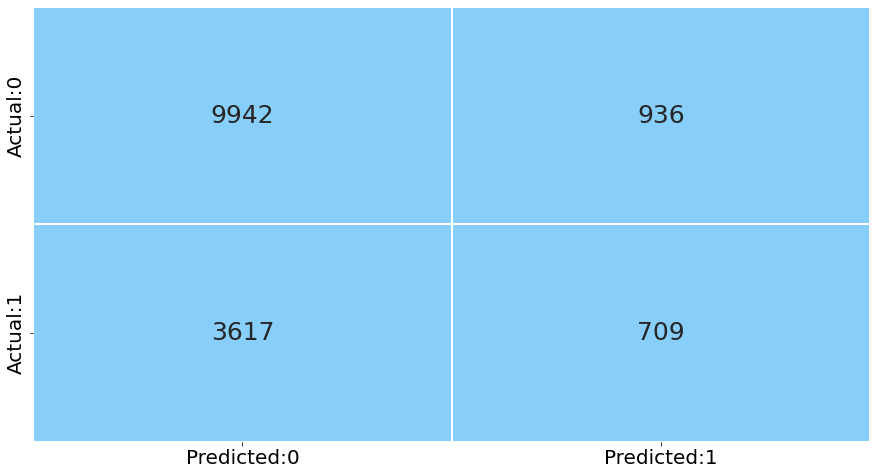

In [26]:
y_pred=rf_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

### Calculate performance measures on the train set.

In [27]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25298
           1       1.00      0.98      0.99     10177

    accuracy                           0.99     35475
   macro avg       1.00      0.99      0.99     35475
weighted avg       0.99      0.99      0.99     35475



### Calculate performance measures on the test set.

In [28]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.73      0.91      0.81     10878
           1       0.43      0.16      0.24      4326

    accuracy                           0.70     15204
   macro avg       0.58      0.54      0.53     15204
weighted avg       0.65      0.70      0.65     15204



# 4.1 Tune the Hyperparameters using GridSearchCV (Random Forest)

In [29]:
import time

In [30]:
%%time
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} 

CPU times: total: 3h 31min 28s
Wall time: 3h 31min 34s


## Build the model using the tuned hyperparameters.

In [31]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(x_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.72      1.00      0.83     10878
           1       0.62      0.01      0.03      4326

    accuracy                           0.72     15204
   macro avg       0.67      0.51      0.43     15204
weighted avg       0.69      0.72      0.61     15204



In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf_model,x_train,y_train,scoring='recall')
np.mean(scores)

0.009041575957096586

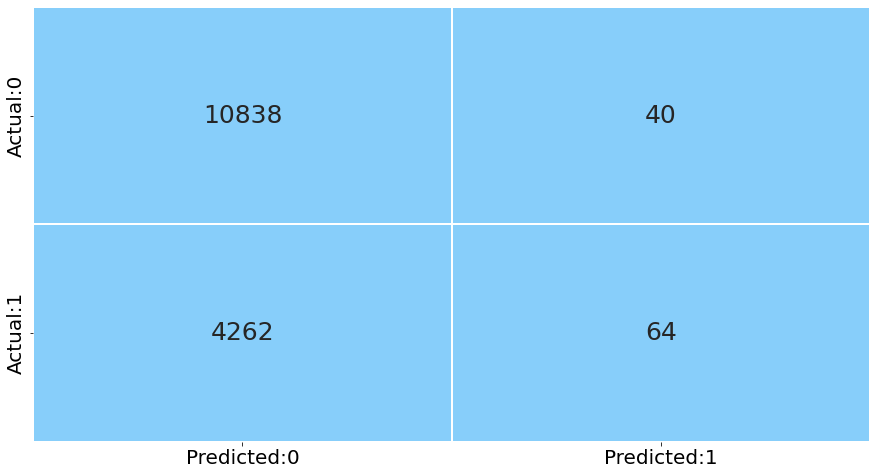

In [33]:
y_pred=rf_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [34]:
rf_model.score(x_train,y_train)

0.7159971811134602

In [35]:
rf_model.score(x_test,y_test)

0.7170481452249408

## Identify the Important Features

Let us create a barplot to identify the important feature in the dataset.

The method feature_importances_ returns the value corresponding to each feature which is defined as the ratio of total decrease in Gini impurity across every tree in the forest where the feature is used to the total count of trees in the forest. This is also caled as, Gini Importance.

There is another accuracy-based method. It calculates the average decrease in the accuracy calculated on the out-of-bag samples, with and without shuffling the variable across all the trees in the random forest. The out-of-bag samples are the samples in the training dataset which are not considered whild building a tree.

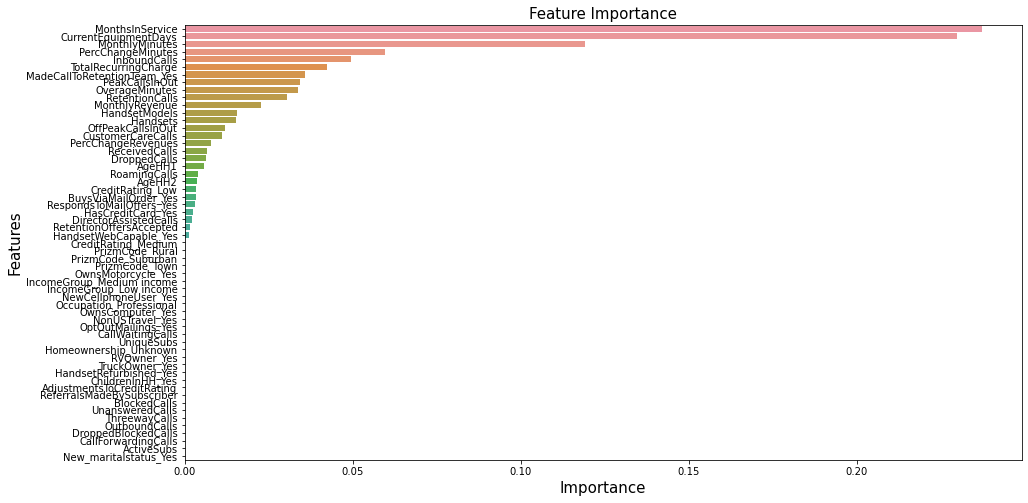

In [36]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

## 4.1 Tune the Hyperparameters using GridSearchCV (Random Forest)

In [37]:
%%time
#'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 
#'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [45,48,50,52,54],
                     'max_depth': [8,9,10,11,12],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [1,1.5,2,2.5,3,4],
                     'min_samples_leaf': [3,4,5,6,7],
                     'max_leaf_nodes': [10,11,12,13]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 45} 

CPU times: total: 9h 48min 30s
Wall time: 9h 48min 57s


In [38]:
# Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 45} 

# CPU times: total: 9h 48min 30s
# Wall time: 9h 48min 57s

### Build the model using the tuned hyperparameters.

In [39]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(x_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.72      1.00      0.83     10878
           1       0.00      0.00      0.00      4326

    accuracy                           0.72     15204
   macro avg       0.36      0.50      0.42     15204
weighted avg       0.51      0.72      0.60     15204



In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf_model,x_train,y_train,scoring='precision')
np.mean(scores)

0.2739393939393939

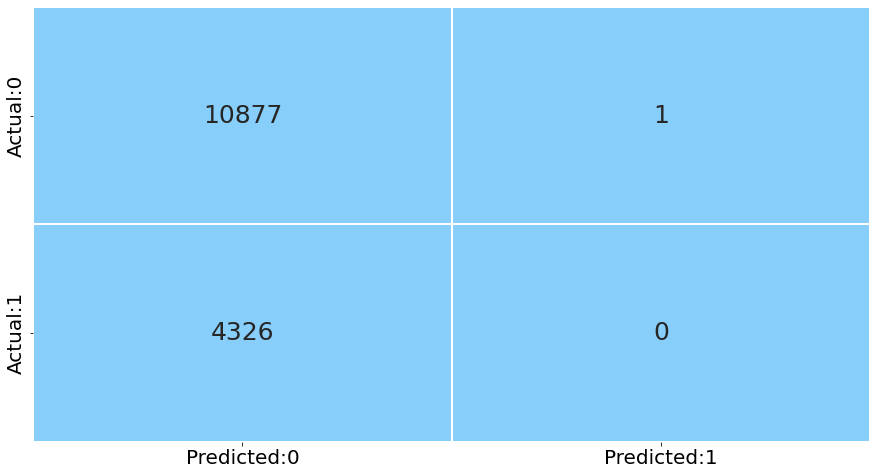

In [41]:
y_pred=rf_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [42]:
rf_model.score(x_train,y_train)

0.7131219168428471

In [43]:
rf_model.score(x_test,y_test)

0.7154038410944489